In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data1=pd.read_csv('Galle.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data1 = data1.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data2 = pd.read_csv('Matara.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data2 = data2.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data3 = pd.read_csv('Hambanthota.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data3 = data3.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data4=pd.read_csv('Katubedda.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data4 = data4.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data5 = pd.read_csv('Fort.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data5 = data5.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data6 = pd.read_csv('BattaramullaCEA.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data6 = data6.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data_list=[data1,data2,data3,data4,data5,data6]
#data = pd.concat([data1, data2, data3])
data = pd.concat(data_list)
#data.reset_index(drop=True, inplace=True)
data = data.sort_index()
data = data.groupby('timestamp_index').mean()
Length=len(data)
data
print(len(data))

8702


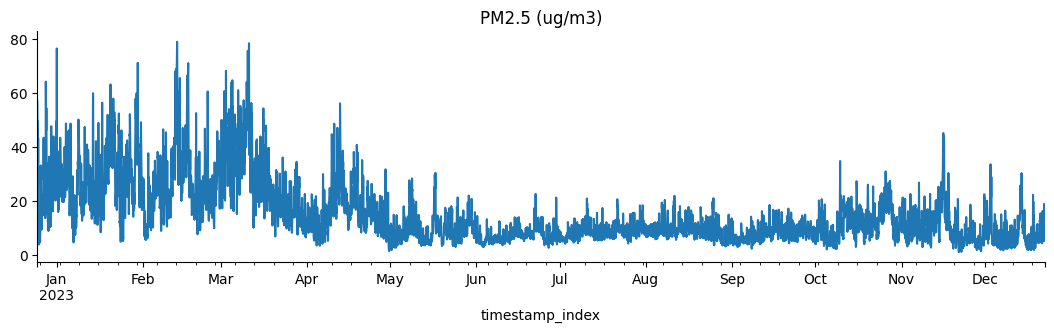

In [3]:
data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
# Splitting data into train and test sets
train_data = data.iloc[:int(Length*0.8)]
#val_data = data.iloc[int(Length*0.6):int(Length*0.8)]
test_data = data.iloc[int(Length*0.8):]
train_data


,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2022-12-25 00:00:00,56.750000,31.400000,65.000000,0.0,25.0,6.0,12.0
2022-12-25 01:00:00,45.250000,31.420000,64.500000,1.0,25.0,6.0,12.0
2022-12-25 02:00:00,43.500000,31.250000,64.000000,2.0,25.0,6.0,12.0
2022-12-25 03:00:00,45.250000,31.020000,65.500000,3.0,25.0,6.0,12.0
2022-12-25 04:00:00,48.750000,30.000000,70.500000,4.0,25.0,6.0,12.0
...,...,...,...,...,...,...,...
2023-10-10 20:00:00,8.916667,30.388333,74.708333,20.0,10.0,1.0,10.0
2023-10-10 21:00:00,8.625000,29.613333,77.041667,21.0,10.0,1.0,10.0
2023-10-10 22:00:00,7.291667,29.180000,78.416667,22.0,10.0,1.0,10.0


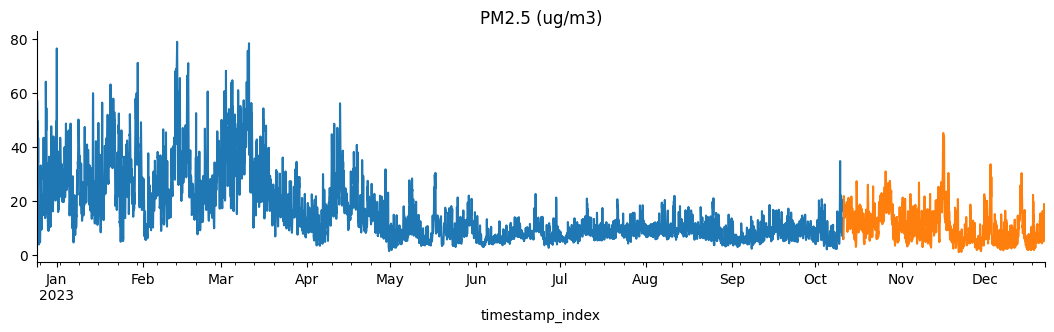

In [5]:
train_data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
test_data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
model_predictions = []

X_train = train_data.drop(columns=['PM2.5 (ug/m3)'])
y_train = train_data['PM2.5 (ug/m3)']
X_test = test_data.drop(columns=['PM2.5 (ug/m3)'])
y_test = test_data['PM2.5 (ug/m3)']

y_test

timestamp_index
2023-10-11 01:00:00     5.833333
2023-10-11 02:00:00     6.000000
2023-10-11 03:00:00     8.333333
2023-10-11 04:00:00     8.625000
2023-10-11 05:00:00    13.958333
                         ...    
2023-12-22 09:00:00     9.500000
2023-12-22 10:00:00    16.500000
2023-12-22 11:00:00    10.000000
2023-12-22 12:00:00     7.250000
2023-12-22 13:00:00     6.000000
Name: PM2.5 (ug/m3), Length: 1741, dtype: float64

In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the initial training data
rf_model.fit(X_train, y_train)

# Initialize a list to store model predictions
model_predictions = []

for i in range(len(y_test)):

  y_pred = rf_model.predict(X_test.iloc[[i]])

  model_predictions.append(y_pred)

  #X_train = X_train.append(X_test.iloc[[i]])
  #y_train = y_train.append(pd.Series(y_test.iloc[i]))
  X_train = pd.concat([X_train, X_test.iloc[[i]]], axis=0)
  y_train = pd.concat([y_train, pd.Series(y_test.iloc[i])], axis=0)

  rf_model.fit(X_train, y_train)
  '''if(i>100):
    break'''
  print(i)

print(model_predictions)

0
1
2
3
4
5
6
7
8


KeyboardInterrupt: 

In [ ]:
print(len(model_predictions))
print(model_predictions)

2002
[array([13.125]), array([9.8725]), array([7.75]), array([11.3025]), array([6.6525]), array([7.5525]), array([7.2825]), array([8.505]), array([3.5775]), array([7.6625]), array([6.3675]), array([7.8875]), array([11.655]), array([11.31]), array([15.1225]), array([5.765]), array([4.9775]), array([11.8275]), array([18.1825]), array([10.7975]), array([10.9225]), array([2.555]), array([10.3575]), array([2.665]), array([9.11]), array([10.2875]), array([9.59]), array([3.5825]), array([12.94]), array([8.0975]), array([2.7825]), array([5.0675]), array([6.5675]), array([2.9575]), array([4.635]), array([5.6525]), array([2.6125]), array([2.86]), array([6.565]), array([6.065]), array([11.3]), array([6.1675]), array([4.1975]), array([6.555]), array([11.095]), array([3.31]), array([4.095]), array([10.9725]), array([6.9975]), array([14.465]), array([10.78]), array([3.8375]), array([12.5875]), array([6.2375]), array([14.375]), array([5.7625]), array([18.1825]), array([8.4575]), array([7.4825]), arra

In [ ]:


# Assuming your test data is stored in DataFrame test_data with features and actual PM2.5 values
#X_test = test_data.drop(columns=['PM2.5 (ug/m3)','Temperature (Celsius)','month','dayofweek','hour','Relative Humidity (%)'])  # Features
#X_test = test_data.drop(columns=['PM2.5 (ug/m3)'])
#y_test = test_data['PM2.5 (ug/m3)']  # Actual PM2.5 values


# Calculate evaluation metrics
mae = mean_absolute_error(y_test, model_predictions)
mse = mean_squared_error(y_test, model_predictions)
rmse = mean_squared_error(y_test, model_predictions, squared=False) # Compute RMSE from MSE

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 3.0893575924075924
Mean Squared Error (MSE): 27.316972862262737
Root Mean Squared Error (RMSE): 5.226564154610822


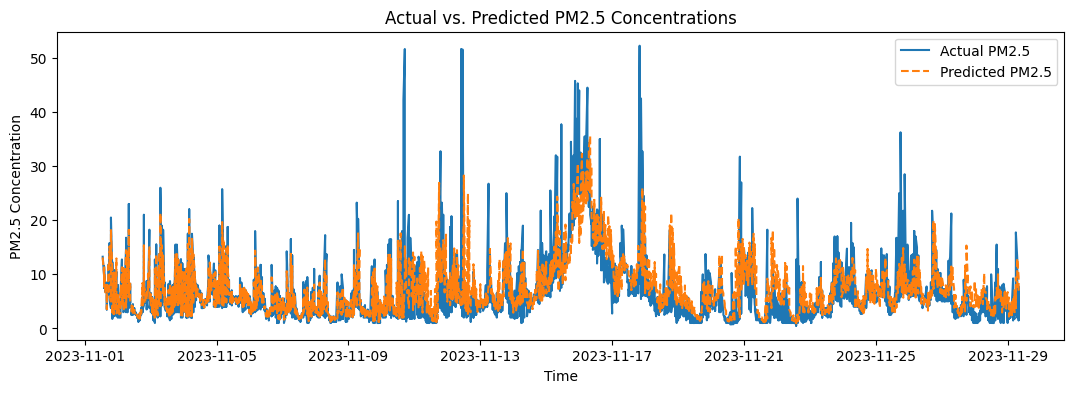

In [ ]:
pred_df = pd.DataFrame(model_predictions, index=y_test.index[0:2002], columns=['Predicted PM2.5'])
#pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['Predicted PM2.5'])

# Plot actual vs. predicted values
plt.figure(figsize=(13, 4))
plt.plot(y_test[0:2002], label='Actual PM2.5')
#plt.plot(y_test, label='Actual PM2.5')
plt.plot(pred_df, label='Predicted PM2.5', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.title('Actual vs. Predicted PM2.5 Concentrations')
plt.legend()
plt.show()


In [ ]:
#X_train = train_data.drop(columns=['PM2.5 (ug/m3)','Temperature (Celsius)','month','dayofweek','hour','Relative Humidity (%)'])  # Features
X_train = train_data.drop(columns=['PM2.5 (ug/m3)'])
y_train = train_data['PM2.5 (ug/m3)']  # Target variable

# Instantiate the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from joblib import dump,load
dump(rf_model,"random forest model cl2.joblib")

In [ ]:
loaded_model = load("random forest model cl2.joblib")